In [1]:
import os
import pyodbc
from dotenv import load_dotenv, dotenv_values, find_dotenv
import pandas as pd

print('all libraries loaded successfully')

all libraries loaded successfully


In [7]:
#reading data from database
#Load environment variables from .env file into a dictionary variable
#.env file MUST be in the same root as the notebook to work or alternatively use find_dotenv
environment_variables=dotenv_values(find_dotenv('.env'))
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#Connecting to the database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Using the connect method of the pyodbc library.
# This will connect to the server. 
connection=pyodbc.connect(connection_string)

#hide warnings
import warnings

warnings.filterwarnings('ignore')

print("connected successfully")

connected successfully


In [3]:
#reading data from the remote database table
query='''SELECT * 
        FROM dbo.oil'''
        
oil=pd.read_sql(query,connection)

oil.to_csv('../Datasets/oil.csv', index=False)

In [4]:
#reading data from the remote database table
query='''SELECT * 
        FROM dbo.holidays_events'''
        
holidays=pd.read_sql(query,connection)

holidays.to_csv('../Datasets/holidays.csv', index=False)

In [5]:
#reading data from the remote database table
query='''SELECT * 
        FROM dbo.stores'''
        
stores=pd.read_sql(query,connection)

stores.to_csv('../Datasets/stores.csv', index=False)

In [2]:
transactions = pd.read_csv('../Datasets/transactions.csv')

In [3]:
transactions = transactions.set_index('date')


In [4]:
min_date = transactions.index.min()
max_date = transactions.index.max()

In [5]:
date_range = pd.date_range(min_date, max_date)
date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [6]:
missing_days_trans = date_range.difference(transactions.index)
len(missing_days_trans)

1688

In [8]:
1688*54


91152

<Axes: ylabel='store_nbr'>

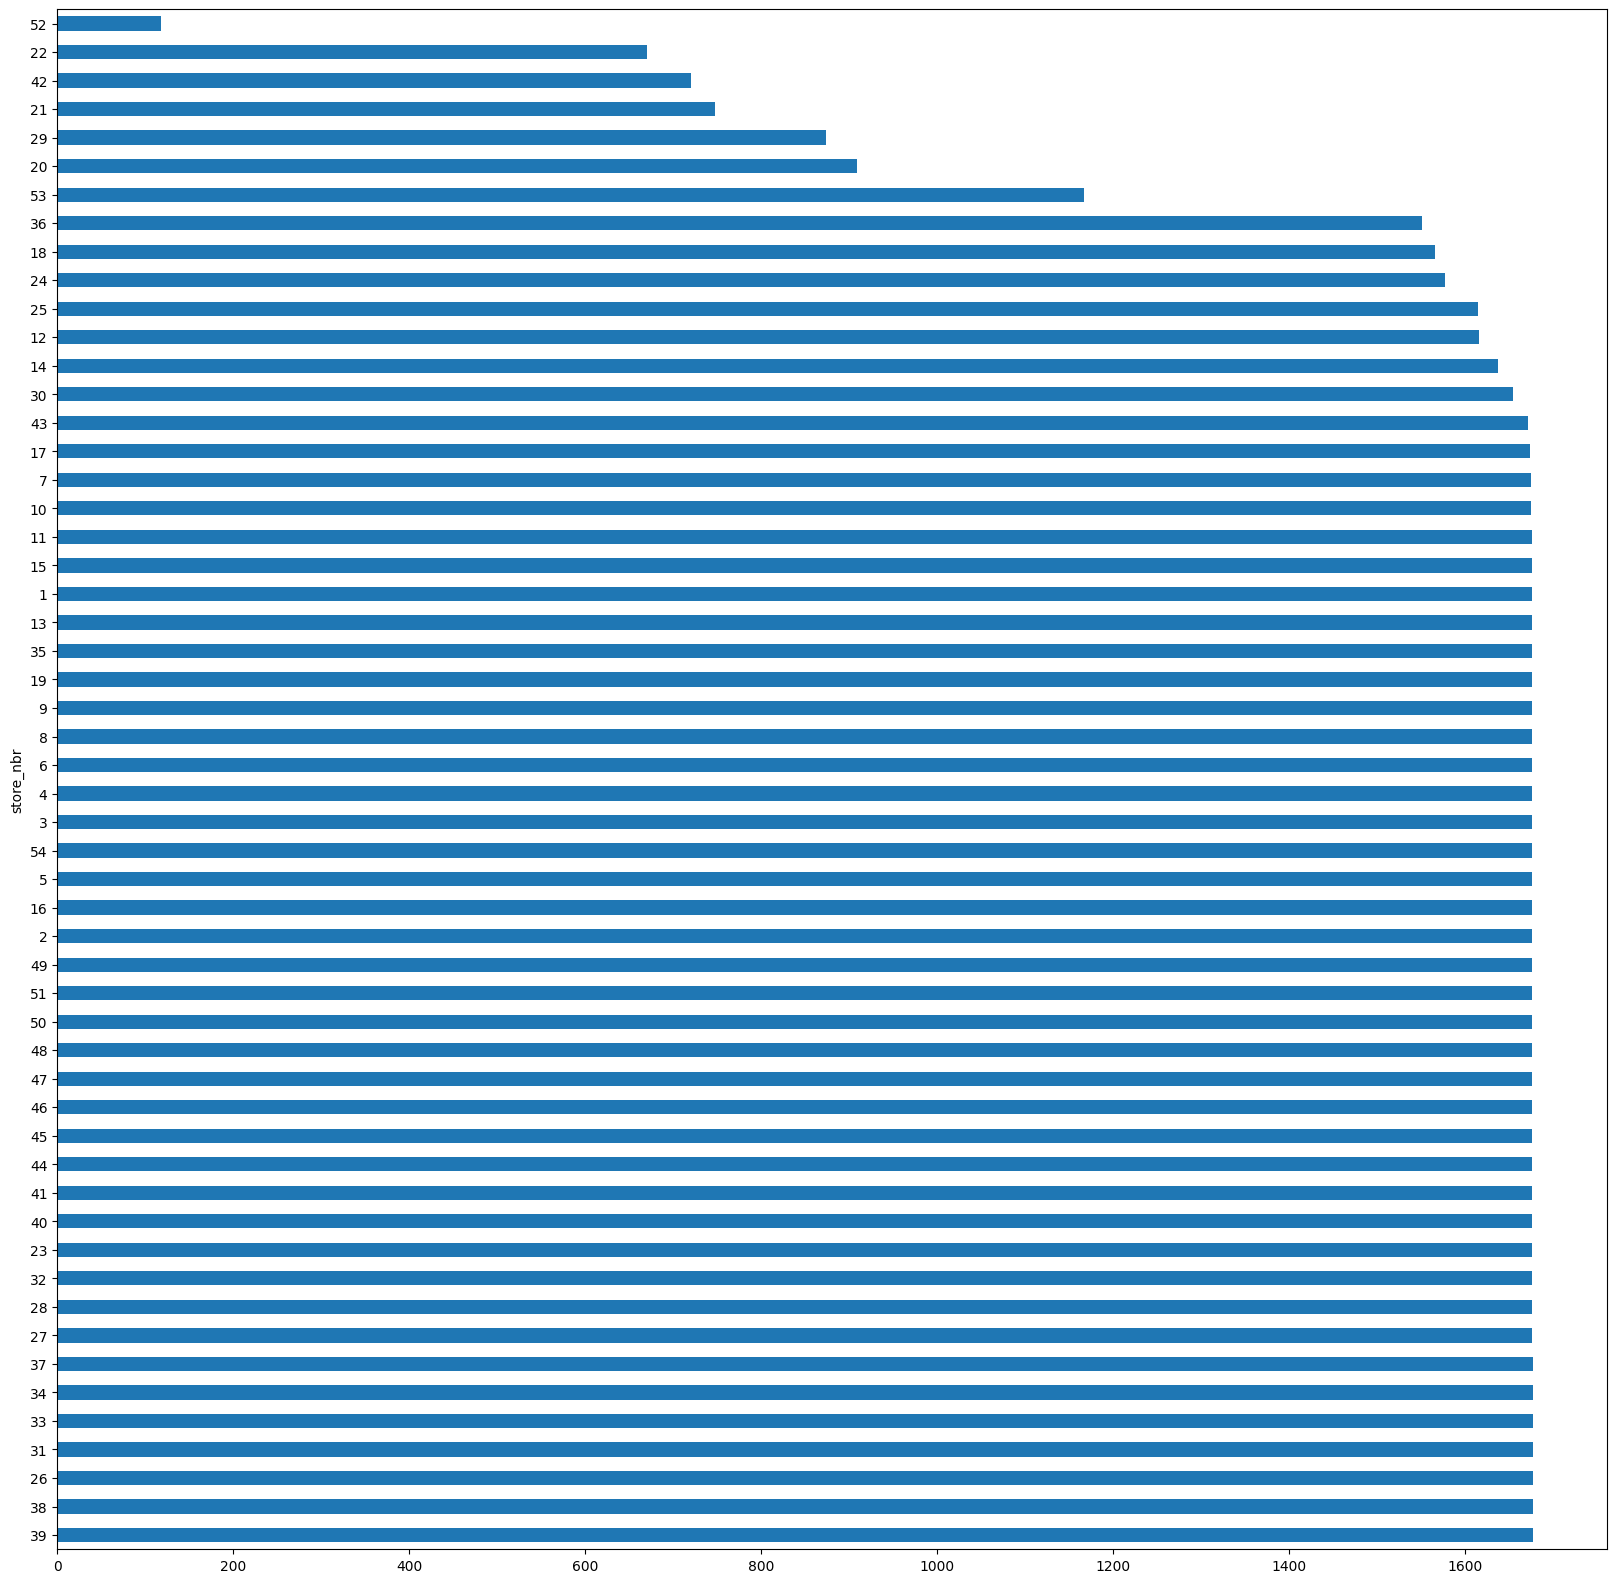

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
transactions['store_nbr'].value_counts().plot.barh()

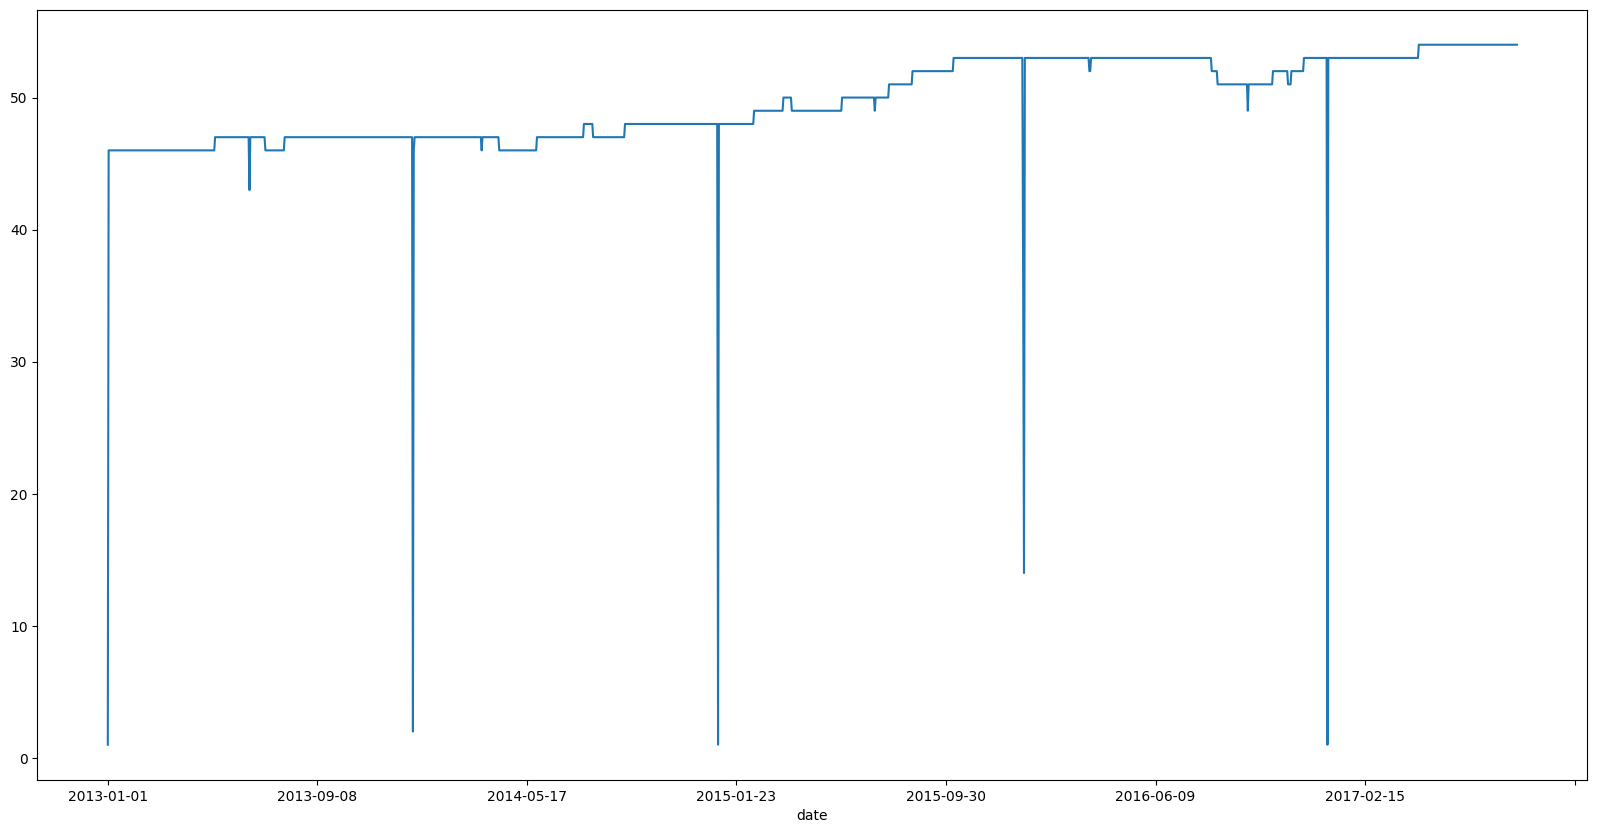

In [14]:
plt.figure(figsize=(20,10))
transactions.groupby(transactions.index).store_nbr.nunique().plot.line()
plt.show()

In [24]:
df = transactions.reset_index()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df = df.set_index('date')
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-02', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-02', '2013-01-02',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=83488, freq=None)

In [41]:
(df
 .loc["2017-01"]) #selecting using date index

,store_nbr,transactions
date,,
2017-01-01,25,1642
2017-01-02,1,516
2017-01-02,2,2083
2017-01-02,3,3918
2017-01-02,4,1682
...,...,...
2017-01-31,49,2680
2017-01-31,50,2158
2017-01-31,51,1448


C:\Users\Harith\AppData\Local\Temp\ipykernel_6316\2422967690.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample('Q')


<Axes: xlabel='date'>

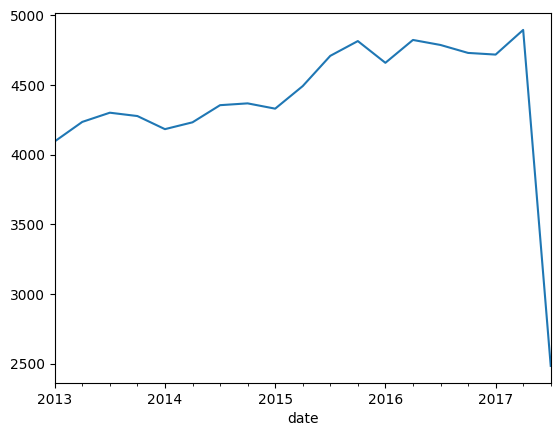

In [45]:
(df
 .store_nbr
 .resample('Q')
 .count()
 .plot())